# Ecommerce customers 

# Importing the necessary libraries

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

#Reading the dataset and assigning it to a dataframe

In [57]:
df = pd.read_csv("Ecommerce.csv")

In [58]:
df #If index needs to be removed use index_col=0

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...,...
618,619,31.941434,11.158640,36.846959,3.219605,559.546775
619,620,33.446133,12.374820,37.592235,4.917733,515.186966
620,621,32.967749,11.392061,36.916664,2.955718,601.715746
621,622,33.469949,11.930872,37.744155,4.577850,477.741395


In [59]:
df['Total Revenue'] = df['Length of MemberShip'] * df['Yealy amount spent']

In [60]:
df

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent,Total Revenue
0,1,32.538350,12.028846,35.850540,3.648854,576.098273,2102.098528
1,2,34.206718,12.226851,37.246443,1.987536,460.784955,915.826873
2,3,31.535240,11.814341,36.610697,3.351191,349.739791,1172.044778
3,4,32.199577,11.295163,37.425695,5.234337,547.709921,2866.898245
4,5,33.570137,13.500972,36.856165,3.938603,487.055641,1918.318621
...,...,...,...,...,...,...,...
618,619,31.941434,11.158640,36.846959,3.219605,559.546775,1801.519619
619,620,33.446133,12.374820,37.592235,4.917733,515.186966,2533.552181
620,621,32.967749,11.392061,36.916664,2.955718,601.715746,1778.502189
621,622,33.469949,11.930872,37.744155,4.577850,477.741395,2187.028251


# EDA

In [61]:
df.shape #Determining the rows and columns of the dataframe

(623, 7)

In [62]:
df.dtypes #determining the data types of the columns and checking the datatype 

Customer ID               int64
Avg Session length      float64
Time on App             float64
Time on Website         float64
Length of MemberShip    float64
Yealy amount spent      float64
Total Revenue           float64
dtype: object

In [63]:
df.isna().sum() #Detrming the null values in the dataframe

Customer ID             0
Avg Session length      0
Time on App             0
Time on Website         0
Length of MemberShip    0
Yealy amount spent      0
Total Revenue           0
dtype: int64

We have no null values in the dataframe

In [64]:
df.duplicated().sum() #Checking the duplicated rows if any

0

In [65]:
df.columns #Getting the columns

Index(['Customer ID', 'Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent', 'Total Revenue'],
      dtype='object')

<AxesSubplot:>

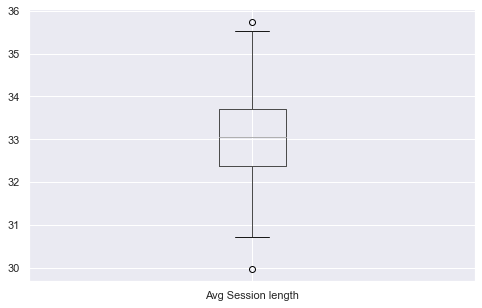

In [66]:
df.boxplot(column=["Avg Session length"]) #Boxplot to check outliers in the "Avg Session length" column

We have one outlier on the upper and the lower quartile 

<AxesSubplot:>

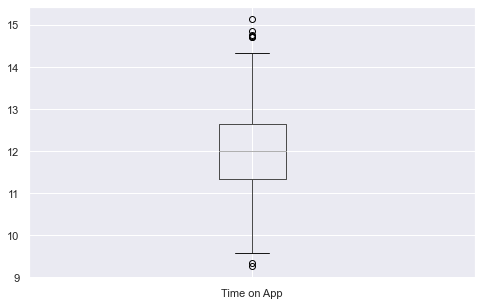

In [67]:
df.boxplot(column=["Time on App"])#Boxplot to check outliers in the "Time on App" column

We have few outliers in the upper and lower quartile range 

<AxesSubplot:>

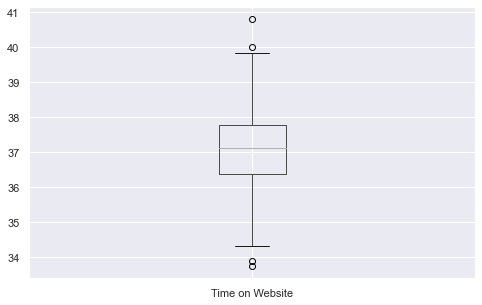

In [68]:
df.boxplot(column=["Time on Website"])#Boxplot to check outliers in the "Time on Website" column

<AxesSubplot:>

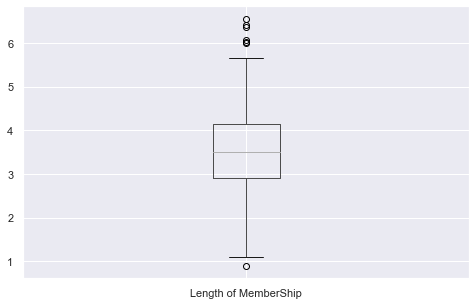

In [69]:
df.boxplot(column=["Length of MemberShip"]) ##Boxplot to check outliers in the "Length of MemberShip" column

We have few outliers in the "Length of membership " column

# Histogram to check the distribution of data

<AxesSubplot:>

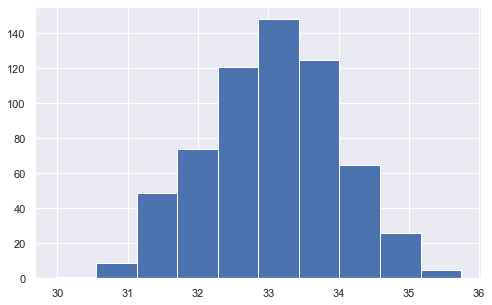

In [70]:
#Histogram
df["Avg Session length"].hist()

<AxesSubplot:>

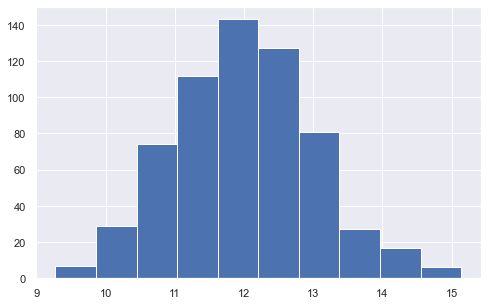

In [71]:
#Histogram
df["Time on App"].hist()

<AxesSubplot:>

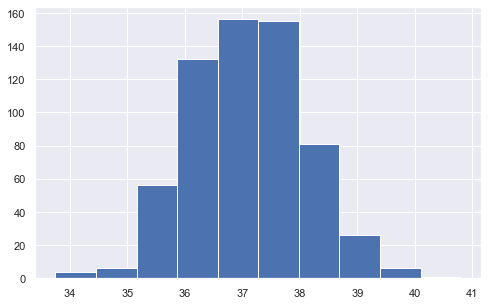

In [72]:
#Histogram
df["Time on Website"].hist()

<AxesSubplot:>

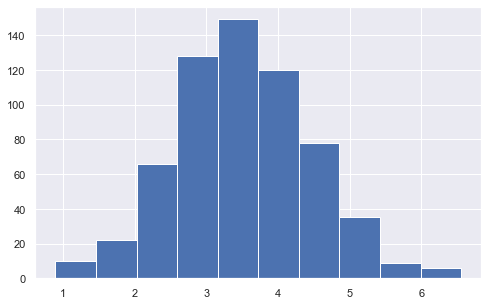

In [73]:
df["Length of MemberShip"].hist()

Interpretation:The independent features 'Avg Session length', 'Time on App', 'Time on Website','Length of MemberShip' 
follow normal distribition  

Lets plot a distplot to understand the distribution of data

<AxesSubplot:xlabel='Avg Session length', ylabel='Density'>

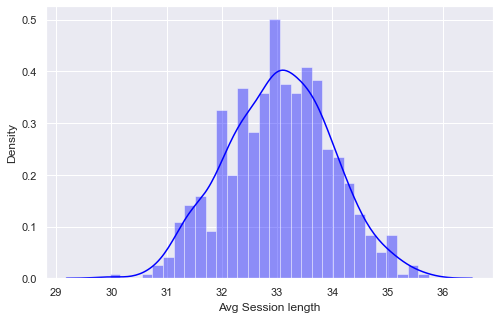

In [74]:
sns.distplot(df['Avg Session length'], color ='blue', bins = 30)

<AxesSubplot:xlabel='Time on App', ylabel='Density'>

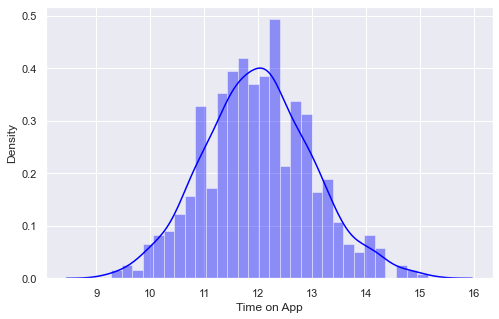

In [75]:
sns.distplot(df['Time on App'], color ='blue', bins = 30)

Using for loop to iterate through the independent features for code optimisation

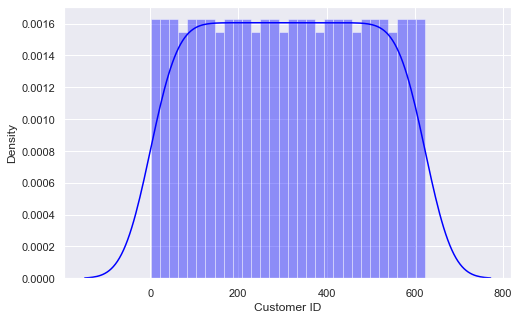

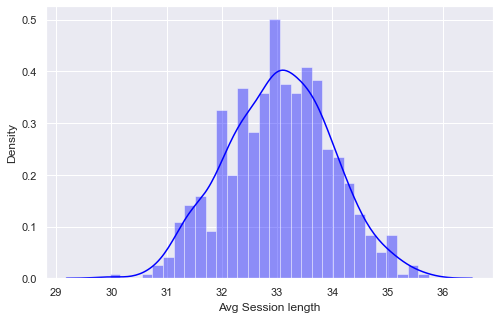

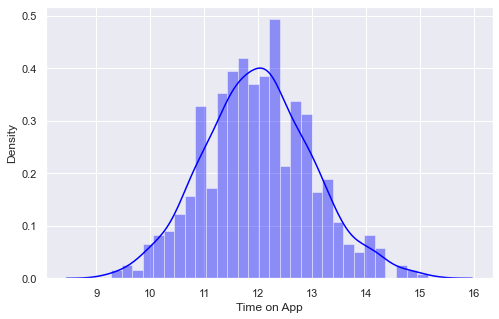

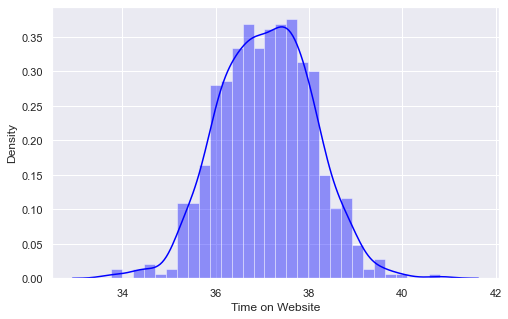

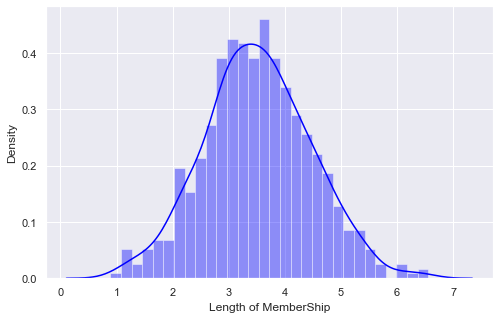

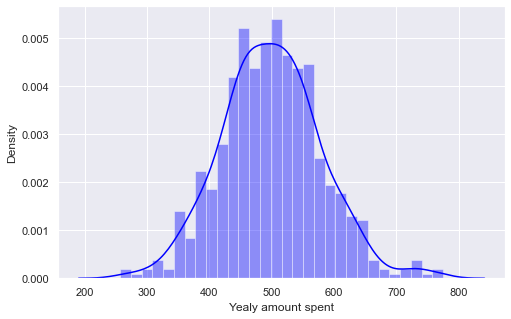

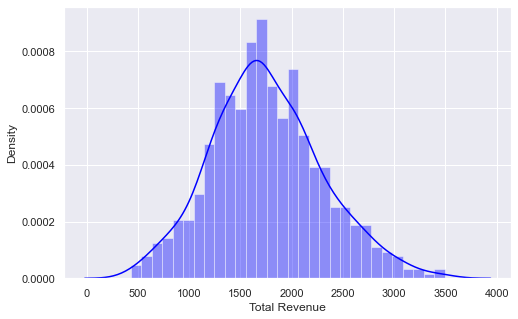

In [76]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    sns.distplot(df[i], color ='blue', bins = 30)
    

In [77]:
df.columns

Index(['Customer ID', 'Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent', 'Total Revenue'],
      dtype='object')

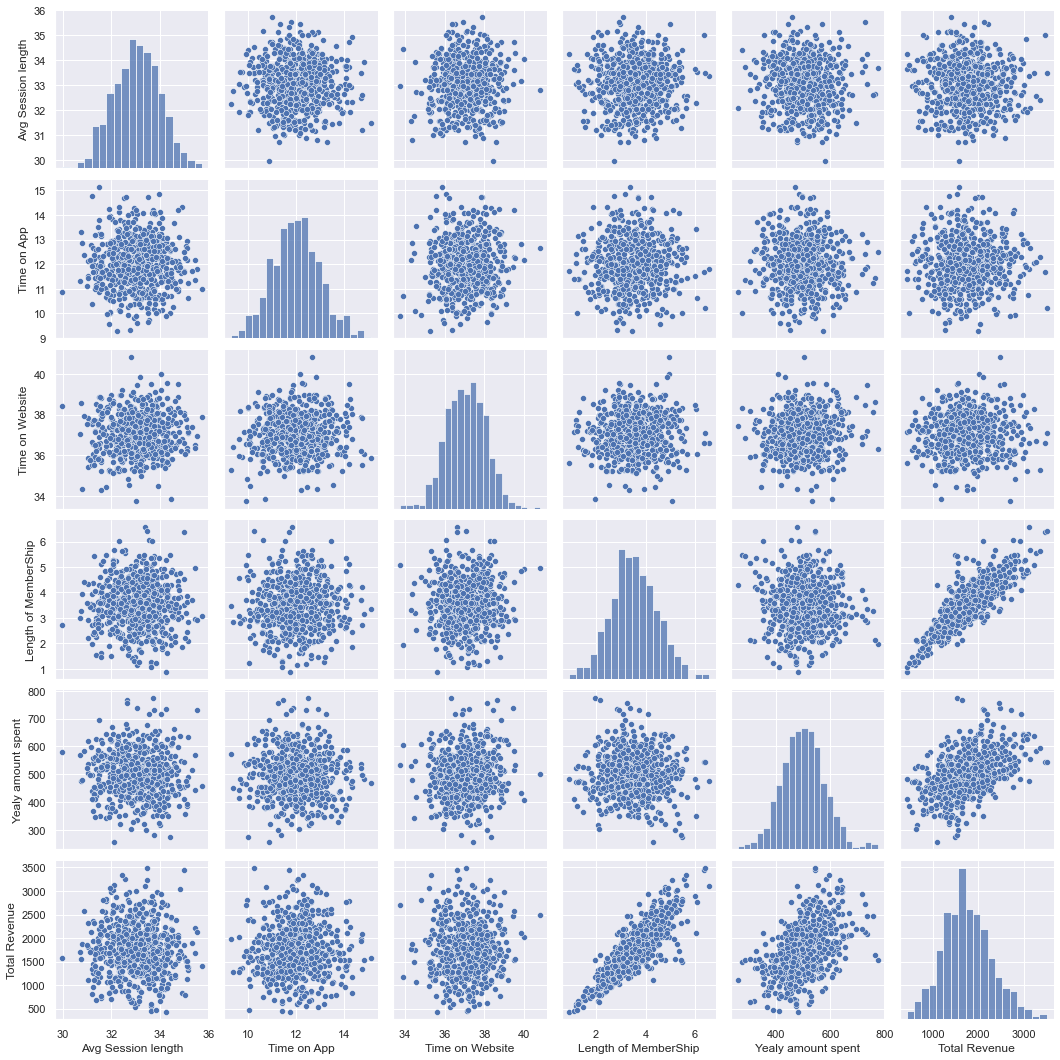

In [78]:
sns.pairplot(df,vars=['Avg Session length', 'Time on App', 'Time on Website','Length of MemberShip','Yealy amount spent','Total Revenue'],)
plt.show()

Interpretation of pairplot:Total Revenue and Length of the membrship columns show positive coorelation and other features have no corelation

In [79]:
df[['Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent','Total Revenue']].corr()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent,Total Revenue
Avg Session length,1.000000,-0.001234,0.050231,-0.010919,-0.042764,-0.041621
Time on App,-0.001234,1.000000,0.040029,0.029839,-0.012348,0.029247
Time on Website,0.050231,0.040029,1.000000,0.036788,0.084305,0.065744
Length of MemberShip,-0.010919,0.029839,0.036788,1.000000,-0.030451,0.844265
Yealy amount spent,-0.042764,-0.012348,0.084305,-0.030451,1.000000,0.491127
Total Revenue,-0.041621,0.029247,0.065744,0.844265,0.491127,1.000000


Interpretation:From the coorelation matric it is evident that "Length of MEmbership and "total Revenue has postive corelation

<AxesSubplot:>

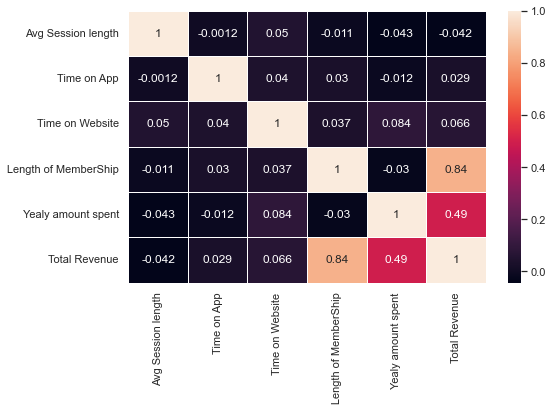

In [80]:
sns.heatmap(df[['Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent','Total Revenue']].corr(),linewidths=0.5,annot=True)

In [81]:
x = df[['Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip']]

In [82]:
x #x contains all the independent features

,Avg Session length,Time on App,Time on Website,Length of MemberShip
0,32.538350,12.028846,35.850540,3.648854
1,34.206718,12.226851,37.246443,1.987536
2,31.535240,11.814341,36.610697,3.351191
3,32.199577,11.295163,37.425695,5.234337
4,33.570137,13.500972,36.856165,3.938603
...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605
619,33.446133,12.374820,37.592235,4.917733
620,32.967749,11.392061,36.916664,2.955718
621,33.469949,11.930872,37.744155,4.577850


In [83]:
y = df[['Total Revenue']] #contains  the target column

In [84]:
y

,Total Revenue
0,2102.098528
1,915.826873
2,1172.044778
3,2866.898245
4,1918.318621
...,...
618,1801.519619
619,2533.552181
620,1778.502189
621,2187.028251


Importing Linear Regression modules

In [85]:
from sklearn.linear_model import LinearRegression #Importing the necessary libararies to build the regression model


In [86]:
lm = LinearRegression()

In [87]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing set

In [88]:
xtrain,xtest,ytrain ,ytest = train_test_split(x,y,test_size=  0.2,random_state=1)

# Training the model on the training set

In [89]:
lm.fit(xtrain,ytrain)
lm.score(xtest,ytest)

0.7397064778910273

# Predict the test set results

In [90]:
ypred = lm.predict(xtest)

In [91]:
ypred[0:5]

array([[1287.20586273],
       [1804.49612435],
       [1727.568115  ],
       [ 624.06015915],
       [1475.60349852]])

Testing the model for the first observation in the dataset.

First observation has these values:

Avg Session length- 32.538350

Time on App- 12.028846

Time on Website	-35.850540

Length of MemberShip- 3.648854

Target:

Total Revenue :	2102.098528



In [92]:
lm.predict([[32.538350,12.028846,35.850540,3.648854]])

array([[1805.53104819]])

The regression mdel has predicted the "Yearly amount spent "1805.53104819"   as against "2102.09852"

Converting ytest to an array so that it can be used for the dataframe

In [93]:
ytest= np.array(ytest)
ytest

array([[1661.32326645],
       [1692.24715153],
       [1699.60461306],
       [ 607.10030685],
       [1778.50218891],
       [2046.50216581],
       [ 759.74355681],
       [1782.92979036],
       [1684.48884532],
       [2032.70779203],
       [1439.16157446],
       [1744.81332844],
       [1302.63335119],
       [1844.01102134],
       [ 729.4467356 ],
       [1199.20710289],
       [1851.07566243],
       [2756.62199275],
       [ 891.77246045],
       [1599.38370771],
       [1506.84264954],
       [1886.27990141],
       [ 478.12189915],
       [1908.34974269],
       [1951.94319548],
       [1630.54110131],
       [1374.14259434],
       [1700.26718516],
       [1053.58355384],
       [2025.88273653],
       [3111.94489667],
       [1328.90961903],
       [2523.5771098 ],
       [1832.1591662 ],
       [2093.49690007],
       [1060.42758674],
       [1844.55249981],
       [2102.09852846],
       [2062.43709805],
       [ 756.4085322 ],
       [2647.7762773 ],
       [2580.262

In [94]:
combined_array = np.column_stack((ytest,ypred,ytest-ypred))
combined_array

array([[ 1.66132327e+03,  1.28720586e+03,  3.74117404e+02],
       [ 1.69224715e+03,  1.80449612e+03, -1.12248973e+02],
       [ 1.69960461e+03,  1.72756811e+03, -2.79635019e+01],
       [ 6.07100307e+02,  6.24060159e+02, -1.69598523e+01],
       [ 1.77850219e+03,  1.47560350e+03,  3.02898690e+02],
       [ 2.04650217e+03,  1.51418521e+03,  5.32316953e+02],
       [ 7.59743557e+02,  9.43027712e+02, -1.83284156e+02],
       [ 1.78292979e+03,  1.64357452e+03,  1.39355275e+02],
       [ 1.68448885e+03,  1.49545310e+03,  1.89035748e+02],
       [ 2.03270779e+03,  2.29894335e+03, -2.66235556e+02],
       [ 1.43916157e+03,  1.34339795e+03,  9.57636249e+01],
       [ 1.74481333e+03,  1.52520899e+03,  2.19604339e+02],
       [ 1.30263335e+03,  1.62797653e+03, -3.25343184e+02],
       [ 1.84401102e+03,  2.22272884e+03, -3.78717823e+02],
       [ 7.29446736e+02,  8.86529603e+02, -1.57082868e+02],
       [ 1.19920710e+03,  1.37338712e+03, -1.74180022e+02],
       [ 1.85107566e+03,  2.20173933e+03

In [95]:
df1 = pd.DataFrame(combined_array,columns=['Ytest','Ypred','Difference'])
df1

,Ytest,Ypred,Difference
0,1661.323266,1287.205863,374.117404
1,1692.247152,1804.496124,-112.248973
2,1699.604613,1727.568115,-27.963502
3,607.100307,624.060159,-16.959852
4,1778.502189,1475.603499,302.898690
...,...,...,...
120,1383.823878,1347.635006,36.188872
121,1799.466646,1762.208572,37.258074
122,1931.810502,1895.377741,36.432760
123,1912.023850,1768.707461,143.316389


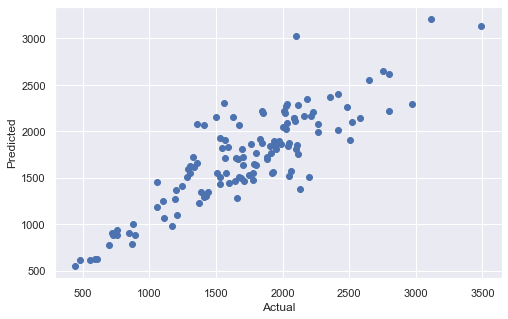

In [96]:
#Scatter plot for test and predicted value
plt.scatter(ytest,ypred)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<AxesSubplot:>

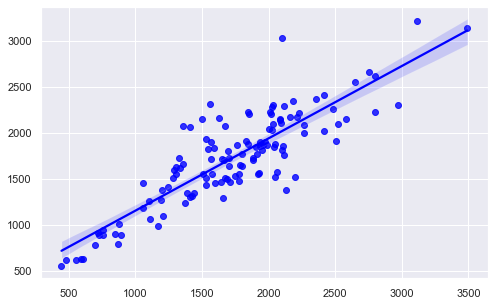

In [97]:
sns.regplot(x = ytest,y = ypred,color='blue')

In [98]:
New_Input = [[34.3,11.1,38.2,6]]

In [99]:
new_output = lm.predict(New_Input)
new_output

array([[2943.34893246]])

# Evaluate the model

In [100]:
from sklearn.metrics import r2_score

In [101]:
r2_score(ytest,ypred)

0.7397064778910273

The r2_score is 0.73~ suggesting the model is not overfitting or under fitting .

In [102]:
from sklearn.metrics import mean_squared_error as MSE,r2_score,mean_absolute_error as mae,mean_absolute_percentage_error as mape
mse = MSE(ytest,ypred)
rmse = np.sqrt(mse)
ac = r2_score(ytest,ypred)
MAE = mae(ytest,ypred)
MAPE = mape(ytest,ypred)
print(f"MSE : {mse}\n RMSE : {rmse}\n Accuracy : {ac}\n MAE: {MAE}\n MAPE : {MAPE} ")


MSE : 82526.63240479991
 RMSE : 287.27448965197016
 Accuracy : 0.7397064778910273
 MAE: 215.8123884847154
 MAPE : 0.13176941451534444 


In [103]:
coefficients = lm.coef_
coefficients

array([[-30.44151105,   6.35242009,  22.84319802, 486.43359969]])

In [104]:
intercept = lm.intercept_
intercept

array([125.76913566])

# Residuals

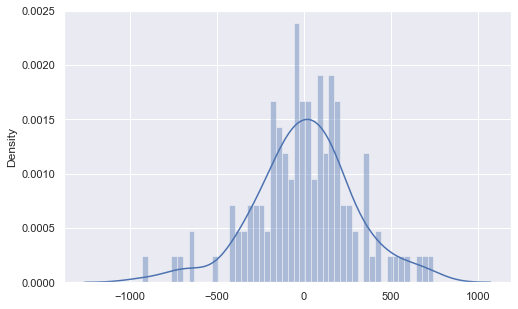

In [105]:
sns.distplot((ytest-ypred),bins=50);

In [106]:
coeff = {
    'columns':['Avg Session length','Time on App','Time on Website','Length of MemberShip'],
    'lm_coeff' :[-30.44151105,   6.35242009,  22.84319802, 486.43359969]}
df_coeff = pd.DataFrame(coeff)

In [107]:
df_coeff

,columns,lm_coeff
0,Avg Session length,-30.441511
1,Time on App,6.352420
2,Time on Website,22.843198
3,Length of MemberShip,486.433600


In [108]:
lm.intercept_

array([125.76913566])

# Random forest Regressor

We will be also using the RandomForest Regressor algorithm to improve the model performanve and accuracy

RandomForest constructs multiple decision tree at the time of training.It also provides good accuracy in predicting

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
rfr = RandomForestRegressor(n_estimators=40)
rfr.fit(xtrain,ytrain)



RandomForestRegressor(n_estimators=40)

In [111]:
ypred = rfr.predict(xtest)
ypred

array([1243.4123647 , 1727.85138704, 1829.89964432,  617.40952354,
       1577.09234564, 1734.50162281,  879.598637  , 1627.59174684,
       1276.56569921, 2147.75850266, 1360.63032817, 1415.77246469,
       1680.10488952, 2395.41208351,  882.28508529, 1455.53838604,
       2358.11124329, 2055.66489207,  961.28747734, 1452.19470682,
       1664.34264742, 1687.05850556,  653.18544441, 1964.2148751 ,
       1680.21008141, 2157.82265746, 1174.63711542, 1585.86552972,
       1237.48090543, 2258.33327178, 3029.57251575, 1781.53426514,
       2052.26833113, 1788.54174477, 2154.91891316, 1477.03240373,
       1970.95243275, 1726.67249883, 1658.11319295,  943.99970244,
       2664.1023213 , 2157.81009082, 2176.41451072,  899.85415796,
       1402.50813544, 2477.01090603,  936.25386626,  682.51702392,
       2978.15635529, 2302.12633736, 2098.71176609, 2222.06356089,
       1829.46118692, 2398.85076828, 2338.92434041, 2610.10863361,
       1127.28109674, 1330.82914134, 1043.84635223, 2013.76074

# CrossValidation

To increase the overall performance of the model lets do the k-fold cross validation wherein the dataset would be split into k sets

K-fold cross validation


K-fold Cross-Validation is when the dataset is split into a K number of folds and is used to evaluate the model's ability when given new data.K refers to the number of groups the data sample is split into

In [112]:
from sklearn.model_selection import KFold


In [113]:
kf = KFold(n_splits=5,random_state=1 ,shuffle=True)
kf

KFold(n_splits=5, random_state=1, shuffle=True)

In [114]:
from sklearn.model_selection import cross_val_score

In [116]:
from sklearn.model_selection import cross_val_score
cvs_linearreg = cross_val_score(LinearRegression(),x,y,cv = kf)
cvs_linearreg

array([0.73970648, 0.68092004, 0.75815867, 0.71917346, 0.62083932])

In [117]:
cvs_linearreg.mean()

0.7037595923118612

CrossValidation for RandomForest regressor

In [118]:
cvs_randomforest = cross_val_score(RandomForestRegressor(n_estimators=40),x,y,cv = kf,n_jobs=-1)
cvs_randomforest

array([0.65709111, 0.66364393, 0.72517522, 0.67792427, 0.5790217 ])

In [119]:
cvs_randomforest.mean()

0.660571246318874

Comparision of the RandomForest Regressor and  LinearRegresssion  cross validation score

In [120]:
cvs_score_comparision = pd.DataFrame({"CrossValidation_LR":[0.73970648, 0.68092004, 0.75815867, 0.71917346, 0.62083932],
                                     "CrossValidation_RF":[0.66672991, 0.64924218, 0.75053168, 0.67439129, 0.57471093]})

In [121]:
cvs_score_comparision

,CrossValidation_LR,CrossValidation_RF
0,0.739706,0.666730
1,0.680920,0.649242
2,0.758159,0.750532
3,0.719173,0.674391
4,0.620839,0.574711


The highset crossvalidation score obtained is 0.758159 from CrossValidation_LR(Croosvalidation for Linear regression model)

In [122]:
xtrain

,Avg Session length,Time on App,Time on Website,Length of MemberShip
311,34.474237,11.094889,37.634411,2.205388
3,32.199577,11.295163,37.425695,5.234337
498,32.502368,11.708869,38.268295,3.148290
9,33.696003,12.488779,36.322443,1.965374
452,31.458388,11.467596,35.845812,3.292072
...,...,...,...,...
129,33.298852,10.891190,36.454557,3.960829
144,33.597525,12.600622,38.725477,2.870866
72,32.957002,12.930322,36.280190,1.476733
235,32.838231,11.563166,35.330290,3.140038


# Feature Scaling

We will print the dataset to observe the range of the feature column 

In [123]:
df

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent,Total Revenue
0,1,32.538350,12.028846,35.850540,3.648854,576.098273,2102.098528
1,2,34.206718,12.226851,37.246443,1.987536,460.784955,915.826873
2,3,31.535240,11.814341,36.610697,3.351191,349.739791,1172.044778
3,4,32.199577,11.295163,37.425695,5.234337,547.709921,2866.898245
4,5,33.570137,13.500972,36.856165,3.938603,487.055641,1918.318621
...,...,...,...,...,...,...,...
618,619,31.941434,11.158640,36.846959,3.219605,559.546775,1801.519619
619,620,33.446133,12.374820,37.592235,4.917733,515.186966,2533.552181
620,621,32.967749,11.392061,36.916664,2.955718,601.715746,1778.502189
621,622,33.469949,11.930872,37.744155,4.577850,477.741395,2187.028251


In [124]:
df.head(1) #loading the first row of the dataset

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent,Total Revenue
0,1,32.53835,12.028846,35.85054,3.648854,576.098273,2102.098528


From the first row it is evident that the each column has a different range and scale.Example Yearly amount spent might be in 
dollars and "length of the membership" might be in years-months and "time on website" might be in hours-seconds etc
Hence to improve the performanve of the model and accuracy we will do the feature scaling 

MinMax scaler

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. 
This Scaler shrinks the data within the range of -1 to 1 if there are negative values. 
This Scaler responds well if the standard deviation is small and is sensitive to outliers

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler = MinMaxScaler()

In [127]:
xtrain

,Avg Session length,Time on App,Time on Website,Length of MemberShip
311,34.474237,11.094889,37.634411,2.205388
3,32.199577,11.295163,37.425695,5.234337
498,32.502368,11.708869,38.268295,3.148290
9,33.696003,12.488779,36.322443,1.965374
452,31.458388,11.467596,35.845812,3.292072
...,...,...,...,...
129,33.298852,10.891190,36.454557,3.960829
144,33.597525,12.600622,38.725477,2.870866
72,32.957002,12.930322,36.280190,1.476733
235,32.838231,11.563166,35.330290,3.140038


In [128]:
ytrain

,Total Revenue
311,1146.619452
3,2866.898245
498,1429.642687
9,1523.828532
452,1934.844010
...,...
129,1982.748023
144,1267.116533
72,538.615170
235,2035.228136


In [129]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [130]:
xtrain

array([[0.77994586, 0.32720676, 0.55025734, 0.24013797],
       [0.38586851, 0.36318043, 0.52068284, 0.79369287],
       [0.43832594, 0.43749113, 0.64007674, 0.41245773],
       ...,
       [0.5170899 , 0.65689091, 0.35836837, 0.10697274],
       [0.49651316, 0.41131952, 0.22377047, 0.41094962],
       [0.66159755, 0.74814484, 0.68570968, 0.49570658]])

In [131]:
xtest

array([[5.28905875e-01, 5.33581840e-01, 3.11690397e-01, 2.82472581e-01],
       [3.73661973e-01, 6.05144883e-01, 2.84456513e-01, 4.69756476e-01],
       [1.93118072e-01, 2.91334245e-01, 6.17288903e-01, 4.21935933e-01],
       [4.08280206e-01, 4.43302002e-01, 6.43283142e-01, 1.41869244e-02],
       [3.88958037e-01, 3.25431229e-01, 4.85259370e-01, 3.41852116e-01],
       [7.74492470e-01, 2.78969933e-01, 7.23667108e-01, 3.65191339e-01],
       [3.21957663e-01, 4.95488574e-01, 5.51600589e-01, 1.33249819e-01],
       [7.04864090e-01, 5.55108829e-01, 4.57338419e-01, 4.18347311e-01],
       [1.45478117e-01, 7.90079701e-01, 5.85103647e-01, 3.27141775e-01],
       [3.19778176e-01, 4.21657959e-01, 7.23737602e-01, 6.36541045e-01],
       [5.16027947e-01, 3.03430075e-01, 3.71394904e-01, 3.03456307e-01],
       [1.70770529e-01, 2.43254956e-01, 4.59459894e-01, 3.52229610e-01],
       [3.52898128e-01, 3.20328216e-01, 3.26530606e-01, 4.04343495e-01],
       [3.19678837e-01, 6.64701719e-01, 4.58654756e

In [132]:
ytrain = np.array(ytrain).reshape(-1,1)

In [133]:
ytrain

array([[1146.61945249],
       [2866.89824461],
       [1429.64268663],
       [1523.82853233],
       [1934.84401015],
       [1508.63502822],
       [1417.19294742],
       [1451.8119971 ],
       [2775.54637932],
       [1768.92795973],
       [1077.29701532],
       [1475.07620167],
       [1635.11430243],
       [1624.15977006],
       [1523.4286236 ],
       [2520.90302012],
       [1580.94301509],
       [1991.06695016],
       [1767.03409581],
       [1406.47314767],
       [1713.45231361],
       [1250.24810847],
       [1313.14775435],
       [1432.42522194],
       [1713.45408161],
       [1154.71657364],
       [2308.10926033],
       [1333.4788437 ],
       [ 866.88870654],
       [1923.0941386 ],
       [1645.38345875],
       [2290.1374405 ],
       [1087.34869846],
       [2567.68038436],
       [2283.96829136],
       [1718.78854402],
       [1588.10760313],
       [1159.49277106],
       [1827.72222586],
       [2593.20618269],
       [2315.58453871],
       [2065.892

In [134]:
ytrain = scaler.fit_transform(ytrain)
ytrain

array([[0.23706857],
       [0.80558017],
       [0.33060108],
       [0.36172728],
       [0.49755821],
       [0.35670619],
       [0.32648674],
       [0.33792752],
       [0.77539053],
       [0.44272687],
       [0.21415914],
       [0.34561579],
       [0.39850461],
       [0.39488439],
       [0.36159512],
       [0.6912369 ],
       [0.38060227],
       [0.51613857],
       [0.44210099],
       [0.32294409],
       [0.42439347],
       [0.2713154 ],
       [0.29210225],
       [0.33152064],
       [0.42439406],
       [0.23974448],
       [0.62091358],
       [0.2988212 ],
       [0.14462416],
       [0.49367516],
       [0.40189832],
       [0.61497432],
       [0.21748099],
       [0.70669572],
       [0.61293556],
       [0.42615697],
       [0.38297   ],
       [0.2413229 ],
       [0.46215699],
       [0.71513139],
       [0.62338398],
       [0.54086671],
       [0.15213733],
       [0.39489848],
       [1.        ],
       [0.55943278],
       [0.28737303],
       [0.387

In [135]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [136]:
ypred = lm.predict(xtest)

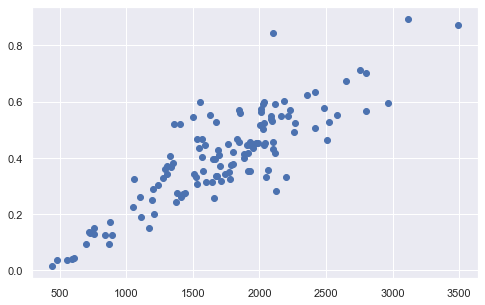

In [137]:
plt.scatter(ytest,ypred)

In [138]:
from sklearn.metrics import mean_squared_error as MSE,mean_absolute_error as MAE,r2_score
mse = MSE(ytest,ypred)
rmse = np.sqrt(mse)

ac = r2_score(ytest,ypred)
print(f"MSE : {mse} \n RMSE : {rmse} \n Accuracy : {ac}")

MSE : 3286931.315588907 
 RMSE : 1812.9896071375883 
 Accuracy : -9.367161534815692


We see negative impact  in the accuracy of the model( -9.367161534815692 ) on using minmax scaler.We will try using standard scaler to check the accuracy

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
ss = StandardScaler()

In [141]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

In [142]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [143]:
ypred = lm.predict(xtest)

In [144]:
mse = MSE(ytest,ypred)
rmse = np.sqrt(mse)

ac = r2_score(ytest,ypred)
print(f"MSE : {mse} \n RMSE : {rmse} \n Accuracy : {ac}")

MSE : 3286828.3601836567 
 RMSE : 1812.9612130941073 
 Accuracy : -9.366836807824274


We see negative impact in the accuracy of the model( -9.367161534815692 ) on using minmax scaler.We will try using standard scaler to check the accuracy

# Xg-Boost algorthm

In [92]:
import sys
!{sys.executable} -m pip install xgboost

In [145]:
from xgboost import XGBRegressor


In [146]:
model_xg=XGBRegressor()
model_xg.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [147]:
ypred = model_xg.predict(xtest)

xgb=r2_score(ytest, ypred)
xgb

-9.366768751792868

Intrepretation : The XG-Boost algorithm has negative impact wherein the accurcay is -9.366768751792868

# Ridge and Lasso Regression

In [149]:
from sklearn.linear_model import Ridge ,Lasso


In [150]:
l2 = Ridge(alpha=10)
l2.fit(xtrain,ytrain)
ypred = l2.predict(xtest)
from sklearn.metrics import r2_score
print(f"Accuracy : {r2_score(ytest,ypred)}")

Accuracy : -9.366845804579745


# Model Deployment

# Pickle

In [144]:
import pickle

pickle.dump(lm, open('model.sav', 'wb'))

In [145]:
load_model = pickle.load(open('model.sav','rb'))

In [146]:
load_model.predict([[32.538350,12.028846,35.850540,3.648854]])

array([[1805.53104819]])

In [151]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.3.


# Business problem: Interpret which variables are contributing towards the more annual income prediction

In [156]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

In [166]:
df.columns

Index(['Customer ID', 'Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent', 'Total Revenue'],
      dtype='object')

Printing the coefficents of the model 

In [168]:
df_coeff

,columns,lm_coeff
0,Avg Session length,-30.441511
1,Time on App,6.352420
2,Time on Website,22.843198
3,Length of MemberShip,486.433600


In [170]:
intercept = lm.intercept_
intercept

array([0.44018082])

Yearly amount spent =(-30.45) * Avg session length +  6.35 *(Time on App) + 22.84 * (Time on website) + 486.45 * (Length of the membership + 0.45

# Conclusion

From the above values of coefficients we can say that

1.1 unit in increase in Avg session length amounts to $-30.45  decrease

2.1 unit in increase in Time on App amounts to $6.35 increase

3.1 unit in increase in Time on website amounts to $22.84  increase

5.1 unit in increase in LEngth of the membership amounts to $0.45 increase

Hence the company should concentrate in the following order

1.Increase Avg session length 
2.Time on App
3.Tiime on website

